# Halbnormalverteilung

In [3]:
%matplotlib inline
import pymc as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import metropolis_commands as mc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [5, 3]

Für die Prior-Verteilung von $ \sigma $ hätten wir auch eine sogenannte   _Halbnormalverteilung_ mit einer
Standardabweichung von $ \sigma_{h} $ wählen können. Eine Halbnormalverteilung ist eine Normalverteilung, wobei der Wertebereich der Halbnormalverteilung nur auf positive Werte (ein\-schliesslich Null) beschränkt ist.  Wir wählen $ \sigma_h=10 $.

In [5]:
df = pd.read_csv("./Daten/chemical_shifts.csv",header=None)
df.head()

,0
0,51.06
1,55.12
2,53.73
3,50.24
4,52.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


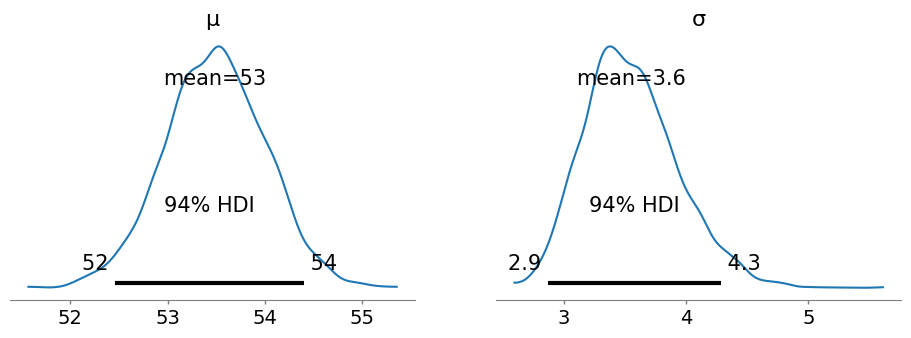

In [6]:
with pm.Model() as model_h:
    μ = pm.Uniform('μ', lower=40, upper=70)
    σ = pm.HalfNormal('σ', sigma=10)
    y = pm.Normal('y', mu=μ, sigma=σ, observed=df)
    trace_h = pm.sample(1000)
az.plot_posterior(trace_h);

In der obigen Abbildung sind die Posterior-Verteilungen von $ \mu $ und $ \sigma $. Der 94\%-HDI sind $ [53,\,54] $ für $ \mu $ und $ [2.9,\, 4.2] $ für $\sigma$. Wir sehen, dass es kaum einen Unterschied zur Abbildung gibt, welche aus der Normalverteilung resultierte. 

In [7]:
az.summary(trace_h)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ,53.488,0.514,52.462,54.404,0.009,0.006,3476.0,2437.0,1.0
σ,3.553,0.383,2.871,4.282,0.007,0.005,3244.0,2457.0,1.0


Wir müssen hier allerdings aufpassen, dass wir $ \sigma $ und $ \sigma_{h} $ nicht verwechseln. Ersteres bezieht sich auf die Likelihood-Funktion, die eine Normalverteilung ist. Letzters ist die Standardabweichung der Halbnormalverteilung für die Prior-Verteilung für $ \sigma $.


Ein möglicher Einwand gegen die Modelle `model_g` und `model_h` ist, dass wir von einer Normalverteilung ausgehen, wobei zwei Datenpunkte weit rechts von der Mehrheit der Daten liegen. Die Normalverteilungsannahme scheint dann nicht erfüllt. Da die Normalverteilung schnell nach links oder rechts  abfällt, ist die Normalverteilung  "überrascht", wenn sie diese beiden Punkte sieht, und reagiert darauf, indem sie sich auf diese Punkte zubewegt und die Standardabweichung erhöht. 

Wir können uns vorstellen, dass diese Punkte bei der Schätzung der Parameterwerte der Normalverteilung ein übermässiges Gewicht haben. Was können wir also tun?

Eine Möglichkeit besteht darin, diese Punkte als Ausreisser zu deklarieren und sie aus den Daten zu entfernen. Daten sollten allerdings nur entfernt werden, wenn wir einen triftigen Grund haben: z.B. eine Fehlfunktion des Geräts oder ein menschlicher Fehler bei der Messung dieser beiden Datenpunkte.

Bevor wir voreilig Messungen aus dem Datensatz entfernen und damit die Daten manipulieren, können wir das Modell so ändern, wie im nächsten Abschnitt erläutert.

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

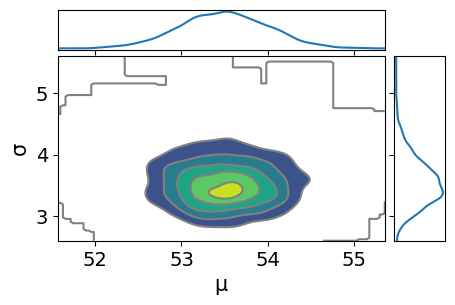

In [9]:
az.plot_pair(trace_h,kind="kde",marginals=True)